In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

In [2]:
tweets_data_path = 'twitter_dataset2.txt'
tweets_data = []
tweets_file = open(tweets_data_path, 'r')

In [3]:
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [4]:
print(tweets_data[24]['text'])

RT @juniorbacchhan: Rahul Gandhi called me a dynast, Good part is that at least I am not busy destroying my own dynasty. 😂😂


In [5]:
tweets = pd.DataFrame()

tweets['name'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['retweets'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

In [6]:
tweets

,name,text,lang,retweets,country
0,yesiamjk,RT @Shehzad_Ind: I was the only one to identif...,en,0,None
1,H4RIMOH4N,RT @TigerRajaSingh: #KarnatakaVerdict Historic...,en,0,None
2,unofficialpattu,Rahul Gandhi Be Like To Sonia After #Karnataka...,hi,0,None
3,JyotiSNK,RT @_ugra_: JDS &amp; congi are a match made i...,en,0,None
4,NikSarathe,RT @_NAN_DINI: Tomorrow Bangalore turns from t...,en,0,None
5,TopconGs,Raja \nWhenever BJP WINS in any State or P.M S...,en,0,None
6,AKohli03,@sagarikaghose @ravishndtv &amp; Congress ka ...,en,0,India
7,rainbowraani,"RT @SuzaneN_: ""A vote for Hitler doesn't neces...",en,0,None
8,bhuvanarox,RT @rahulroushan: LOL. BJP spokie congratulate...,en,0,None
9,Raghwen8546,Bjp in 1 more state congratulations\n#karnatak...,en,0,None


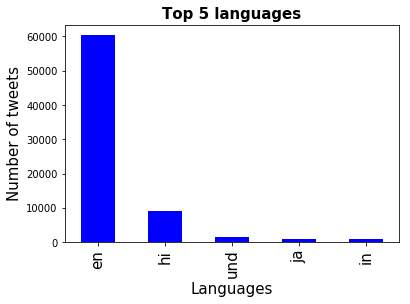

In [7]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='blue')
plt.show()

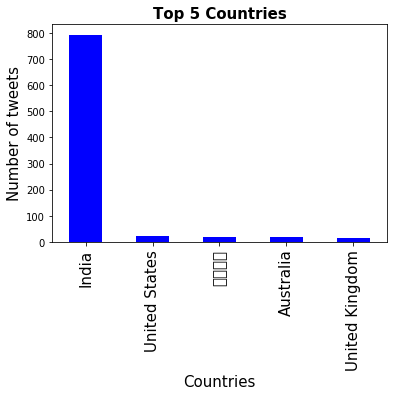

In [8]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
plt.show()

In [9]:
strings = twitter_samples.strings('negative_tweets.json')
for string in strings[:5]:
    print(string)

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(


In [10]:
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict


create_word_features(['the', 'quick', 'brown', 'the', 'jumps' , 'quick'])

{'brown': True, 'jumps': True, 'quick': True}

In [11]:
neg_reviews = []

# Write the code to extract the negative reviews here
for text in twitter_samples.strings('negative_tweets.json'):
    text = text.replace(":", "").replace(")", "").replace("(", "")    
    tokens = word_tokenize(text)
    neg_reviews.append((create_word_features(tokens), 'negative'))

In [12]:
print(neg_reviews[0])
print(len(neg_reviews))

({'hopeless': True, 'tmr': True}, 'negative')
5000


In [13]:
pos_reviews = []

# Write the code to extract the negative reviews here
for text in twitter_samples.strings('positive_tweets.json'):
    text = text.replace(":", "").replace(")", "").replace("(", "")
    tokens = word_tokenize(text)
    pos_reviews.append((create_word_features(tokens), 'positive'))

In [14]:
print(pos_reviews[0])
print(len(pos_reviews))

({'#': True, 'FollowFriday': True, '@': True, 'France_Inte': True, 'PKuchly57': True, 'Milipol_Paris': True, 'top': True, 'engaged': True, 'members': True, 'community': True, 'week': True}, 'positive')
5000


In [15]:
train_set = neg_reviews[:4000] + pos_reviews[:4000]
test_set = neg_reviews[4000:] + pos_reviews[4000:]

print(len(train_set), len(test_set))

8000 2000


In [16]:
NBC = NaiveBayesClassifier.train(train_set)

accuracy = nltk.classify.util.accuracy(NBC, test_set)

print(accuracy * 100)

75.9


In [17]:
sentiment_df = tweets[['text', 'name']][:2000]

In [18]:
feature_list = []
sent_list = []
for tweet in sentiment_df['text']:
    text = tweet.replace(":", "").replace(")", "").replace("(", "")
    tokens = word_tokenize(text)
    word_features = create_word_features(tokens)
    feature_list.append(word_features)

In [19]:
for feature in feature_list:
    sent_list.append(NBC.classify(feature))

In [22]:
sentiment_df['sentiment'] = sent_list

sentiment_df

,text,name,sentiment
0,RT @Shehzad_Ind: I was the only one to identif...,yesiamjk,positive
1,RT @TigerRajaSingh: #KarnatakaVerdict Historic...,H4RIMOH4N,positive
2,Rahul Gandhi Be Like To Sonia After #Karnataka...,unofficialpattu,positive
3,RT @_ugra_: JDS &amp; congi are a match made i...,JyotiSNK,positive
4,RT @_NAN_DINI: Tomorrow Bangalore turns from t...,NikSarathe,positive
5,Raja \nWhenever BJP WINS in any State or P.M S...,TopconGs,negative
6,@sagarikaghose @ravishndtv &amp; Congress ka ...,AKohli03,positive
7,"RT @SuzaneN_: ""A vote for Hitler doesn't neces...",rainbowraani,positive
8,RT @rahulroushan: LOL. BJP spokie congratulate...,bhuvanarox,negative
9,Bjp in 1 more state congratulations\n#karnatak...,Raghwen8546,positive


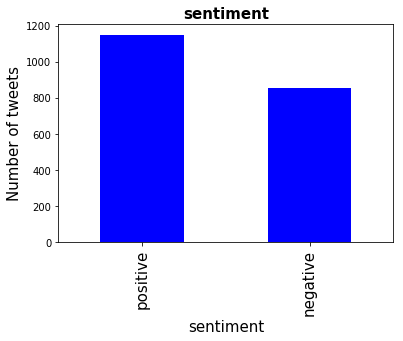

In [23]:
tweets_by_sentiment = sentiment_df['sentiment'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('sentiment', fontsize=15, fontweight='bold')
tweets_by_sentiment[:5].plot(ax=ax, kind='bar', color='blue')
plt.show()